<a href="https://colab.research.google.com/github/kaustubholpadkar/kaustubholpadkar.github.io/blob/master/Problem_7_Finding_Minimum_Value_Using_VQE_Kaustubh_Olpadkar_112584724.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Take Home Assignment
## CSE 550.01 Quantum Computing and Applications - Spring 2020
## Name: Kaustubh Olpadkar
## SBU ID: 112584724

## Problem:

### Find the Minimum value using VQE:

$$<H>= 2<ZXX>- 3<IIZ>+0.5<XIX>$$

###### Install Qiskit

In [0]:
!pip install -q qiskit

     |████████████████████████████████| 6.7MB 4.6MB/s 
     |████████████████████████████████| 23.4MB 84kB/s 
     |████████████████████████████████| 163kB 48.7MB/s 
     |████████████████████████████████| 174kB 50.9MB/s 
     |████████████████████████████████| 1.9MB 48.8MB/s 
     |████████████████████████████████| 5.6MB 44.8MB/s 
     |████████████████████████████████| 768kB 33.6MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 296kB 41.3MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 573kB 35.8MB/s 
     |████████████████████████████████| 31.0MB 121kB/s 
     |████████████████████████████████| 24.3MB 1.3MB/s 
     |████████████████████████████████| 2.7MB 44.4MB/s 


In [0]:
import warnings
warnings.filterwarnings('ignore')

###### Import Libraries

In [0]:
from qiskit import Aer,IBMQ
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister,execute
from qiskit.tools import visualization
from qiskit.tools.monitor import job_monitor
%matplotlib inline

In [0]:
from qiskit.aqua.operators import WeightedPauliOperator
from qiskit.aqua.components.initial_states import Zero
from qiskit.aqua.components.variational_forms import RY, RYRZ, swaprz
from qiskit.aqua.components.optimizers import COBYLA, L_BFGS_B, SLSQP, SPSA
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import VQE
from qiskit.aqua.algorithms import ExactEigensolver
import matplotlib.pyplot as plt

###### Enable IBMQ Account

In [0]:
IBMQ.enable_account("API_KEY")

###### Pauli Dict

In [0]:
pauli_dict = {
    'paulis': [
                {"coeff": {"imag": 0.0, "real": +2.0}, "label": "ZXX"},
                {"coeff": {"imag": 0.0, "real": -3.0}, "label": "IIZ"},
                {"coeff": {"imag": 0.0, "real": +0.5}, "label": "XIX"}
              ]
}
qubit_op = WeightedPauliOperator.from_dict(pauli_dict)
num_qubits = qubit_op.num_qubits
print('Number of qubits: {}'.format(num_qubits))

Number of qubits: 3


In [0]:
exact_val = ExactEigensolver(qubit_op.copy())
result = exact_val.run()
ref = result['energy']
print('Reference value: {}'.format(ref))

Reference value: -3.640054944640259


In [0]:
backend_sim = Aer.get_backend('statevector_simulator')  

In [0]:
init_state_Zero = Zero(num_qubits)
var_form = RY(num_qubits, initial_state=init_state_Zero)
optimizers = [SLSQP,L_BFGS_B,COBYLA,SPSA]

converge_cnts = np.empty([len(optimizers)], dtype=object)
converge_vals = np.empty([len(optimizers)], dtype=object)
param_vals = np.empty([len(optimizers)], dtype=object)

for i in range(len(optimizers)):
    aqua_globals.random_seed = 250
    optimizer = optimizers[i]()

    counts = []
    values = []
    params = []
    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)
        params.append(parameters)
  
    algo = VQE(qubit_op, var_form, optimizer, callback=store_intermediate_result)
    quantum_instance = QuantumInstance(backend=backend_sim)  
    algo_result = algo.run(quantum_instance)
    converge_cnts[i] = np.asarray(counts)
    converge_vals[i] = np.asarray(values)
    param_vals[i] = np.asarray(params)

    print('\rOptimizer: {} : Energy: {}'.format(type(optimizer).__name__, algo_result['energy']), end='\n')

Optimizer: SLSQP : Energy: -3.6400546936261
Optimizer: L_BFGS_B : Energy: -3.64005494463911
Optimizer: COBYLA : Energy: -3.64005492637142
Optimizer: SPSA : Energy: -3.64004345459263


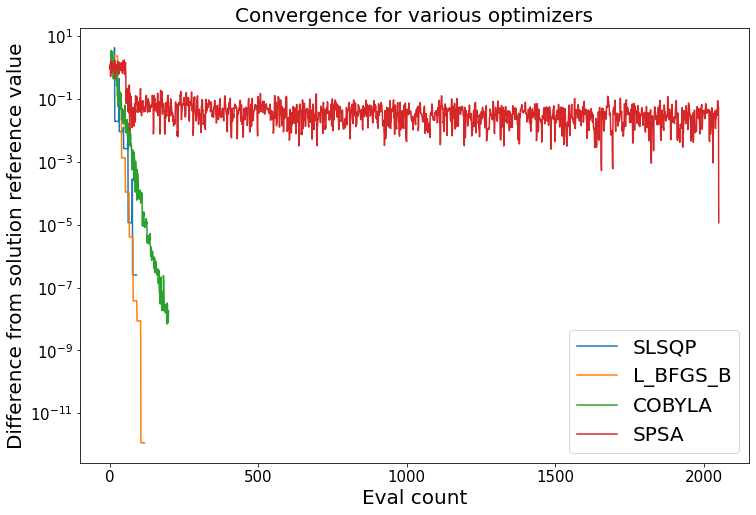

In [0]:
plt.figure(figsize=(12,8))
for i in range(len(optimizers)):
    plt.plot(converge_cnts[i], abs(ref - converge_vals[i]), label=optimizers[i].__name__)
plt.xlabel('Eval count',fontsize=20)
plt.ylabel('Difference from solution reference value',fontsize=20)
plt.title('Convergence for various optimizers',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.yscale('log')
plt.legend(loc=4,fontsize=20)

### Conclusion:

#### Reference value: -3.640054944640259

#### Optimizer: SLSQP : Energy: -3.6400546936261
#### Optimizer: L_BFGS_B : Energy: -3.64005494463911
#### Optimizer: COBYLA : Energy: -3.64005492637142
#### Optimizer: SPSA : Energy: -3.64004345459263

#### From above results we can see that the values obtained by VQE using different optimizers is very close to the Reference Value.